2.단순선형회귀

Contents
<div id="toc"></div>

# 1.회귀분석

- 데이터의 값은 평균과 같은 기존의 경향으로 돌아가려는 경향이 있다는 것
- 여러 변수들 간의 상관 관계를 파악하여, 어떤 특정 변수의 값을 다른 변수들의 값을 이용하여 설명/예측하는 기법
![image.png](img/ch2_1.png)

- 빨간 점선이 회귀 모형, 파란 점을 다 지나가는가, 어느 정도 빗겨나가는가?, 최대한 덜 빗겨나가도록 하는 것이 목표

## 1.1.회귀분석 유형

변수의 개수 및 계수의 형태에 따라 구분한다.  
- 독립변수의 개수에 따라
    - 단순 : 독립변수가 1개인 경우
    - 다중 : 독립변수가 여러 개인 경우
- 회귀계수의 형태에 따라
    - 선형 : 계수를 선형 결합으로 표현할 수 있는 경우
    - 비선형 : 계수를 선형 결합으로 표현할 수 없는 경우

# 2.단순 선형 회귀

- 독립변수가 1개이고 종속변수도 1개인 경우, 그들 간의 관계를 선형적으로 파악하는 회귀 방식
- 독립변수 X와 종속변수 Y의 관계를 Y = aX + b 형태의 1차 함수식으로 표현할 수 있다
![image.png](img/ch2_2.png)

- 회귀 계수 (coefficient)
    - 독립변수가 종속변수에 끼치는 영향력의 정도로서, 직선의 기울기(slope)
- 절편 (intercept)
    - 독립변수가 0일 때의 상수 값
    
![image.png](img/ch2_3.png)

- 잔차 (residual)
    - 실제 값과 회귀식의 차이에 따른 **오류 값**
    - 잔차 값이 작을수록, 구해진 회귀식이 데이터들을 더욱 잘 설명하고 있다고 볼 수 있다.
![image.png](img/ch2_4.png)

## 2.1.잔차제곱합(Residual Sum of Squares)

### 잔차제곱합 (RSS; Residual Sum of Squares)
- 잔차는 양수 또는 음수가 될 수 있는 값이므로 이들을 단순히 더하면 안 되고,이 값들의 제곱을 구해서 더한다.    
    (잔차 값을 그냥 더하면 편향이 생긴다.)![image.png](img/ch2_5.png)
                        (이 때, xi는 독립변수 집합 X의 원소, yi는 종속변수 집합 Y의 원소이다.)
- 이 때, RSS를 회귀 분석에서의 **손실 함수(loss function)** 또는 **비용 함수(cost function)**라고 한다.

- 최적의 회귀 모형을 만든다는 것은 RSS 값이 최소가 되는 회귀 계수를 구한다는 의미이다

## 2.2.회귀 분석 평가 지표

지표 | 의미 | 수식 | 대응 함수
:---:|:---:|:---:|:---:
MAE|Mean Absolute Error, 즉 실제값과 예측값의 차이의 절대값들의 평균|![image.png](./img/MAE.PNG)| **metrics** 모듈의 **mean_absolute_error**
MSE|Mean Squared Error, 즉 실제값과 예측값의 차이의 제곱들의 평균|![image.png](./img/MSE.PNG)|**metrics** 모듈의 **mean_squared_error**
RMSE|Root of MSE, 즉 MSE의 제곱근 값|![image.png](./img/RMSE.PNG)|math 또는 numpy 모듈의 sqrt
R2|결정 계수라고 하며, 실제값의 분산 대비 예측값의 분산의 비율|![image.png](./img/R2.PNG)|**metrics** 모듈의 **r2_score**또는 **LinearRegression**의 **score**


### 결정 계수 (Coefficient of Determination)
- 회귀식이 얼마나 설명력이 있는지 (즉, 얼마나 정확한지) 나타내는 지표이다.
![image.png](./img/coef_deter.PNG)
            (이 때, yi는 실제값 yi에 대한 예측값, y-는 실제값들의 평균이다.)
- 결정 계수의 값은 0 ≤ R^2 ≤ 1이며, 1에 가까울수록 설명력이 강하고 0에 가까울수록 설명력이 약하다.
- **일반적으로 결정 계수 R^2의 값이 0.65 (65%) 이상이면 설명력이 있다고 판단한다.** (0.8, 0.9 현실적 불가능)

## 2.3.최소제곱법(Ordinary Least Squares)

### 최소제곱법 (OLS; Ordinary Least Squares)
- 잔차제곱합 RSS 값이 최소화 되도록하는 방법, 손실 함수의 매개변수 w0와 w1의 값을 구한다.
- w0와 w1으로 RSS 함수를 각각 편미분한 값이 0이 되는 연립 방정식의 해를 구한다.

### 예제1

**1. linear_model 모듈에 있는 LinearRegression을 이용하여 OLS 방법으로 선형 회귀를 수행할 수 있는 객체를 생성한다.**
- 이 때 다음과 같은 매개변수들을 추가 설정할 수 있으나, 대부분의 경우에는 필요하지 않다.
- fit_intercept : 절편 값을 계산할 것인지의 여부를 결정한다. 기본값은 True이다.
- normalize : 회귀를 수행하기 전에 데이터를 정규화할 것인지의 여부를 결정한다. 기본값은 False이다.

In [3]:
import sklearn.linear_model as lm

lr = lm.LinearRegression()

**2. 선형 회귀를 수행할 객체에 대하여 fit 메소드를 이용하여 학습을 수행하여 회귀 모형을 추정한다.**
- 첫 번째 매개변수는 학습용 데이터의 독립변수 집합이다.
- 두 번째 매개변수는 학습용 데이터의 종속변수 집합이다.

In [4]:
X_train = [[1],[2],[3],[4],[5]]           # 항상 2차원형태로!
y_train = [2.3, 3.99, 5.15, 7.89, 8.6]

reg = lr.fit(X_train, y_train)

*독립변수의 특성이 1개 밖에 없더라도 각 값들은 리스트 또는 배열의 형태여야 한다.*


**3. 실행 객체 또는 추정된 회귀 모형에 대하여 predict 메소드를 이용하여 예측을 수행한다.**
- 매개변수는 검증용 데이터의 독립변수 집합이다.
- 반환 결과는 검증용 데이터에 대한 종속변수 예측값이다.

In [5]:
X_test = [[6], [7]]
y_test = [10.1, 11.9]

y_pred = reg.predict(X_test)

In [6]:
print(y_pred)

[10.536 12.186]


**4.1. 분석 결과를 평가한다. (MSE 및 RMSE)**
- metrics 모듈에 있는 mean_squared_error 함수를 이용하여 MSE를 구한다.

In [7]:
import sklearn.metrics as mt

# 전차 제곱들의 평균
mse = mt.mean_squared_error(y_test, y_pred)   # function(정답, 예측값)
print("MSE: {:.3f}".format(mse))

MSE: 0.136


- MSE의 제곱근을 계산하여 RMSE를 구한다.

In [8]:
import numpy as np

# mse 제곱근값
rmse = np.sqrt(mse)
print("RMSE: {:.3f}".format(rmse))

RMSE: 0.369


- MSE, RMSE로 얼만큼 큰 오차인지 짐작할 수 없다?

**4.2. 분석 결과를 평가한다. (결정 계수 R^2)**
- metrics 모듈에 있는 r2_score 함수를 이용하여 결정계수 R^2 값을 구한다.
- 이 때 첫 번째 매개변수는 검증용 데이터의 종속변수 실제값(정답)이고, 두 번째 매개변수는 종속변수 예측값이다.

In [14]:
# 예측값 분산 / 실제값 분산

r2 = mt.r2_score(y_test, y_pred)
print("R2: {:.3f}".format(r2))

R2: 0.832


- 또는, 실행 객체 또는 추정된 회귀 모형에 대하여 score 메소드를 호출하여 R2 값을 구할 수도 있다.
- 이 때 첫 번째 매개변수는 검증용 데이터의 독립변수이고, 두 번째 매개변수는 종속변수이다.

In [11]:
# (독립변수, 종속변수)
# (특성(속성), 레이블)
# 직접 X_test로 y_pred를 계산 후 y_test와 결정계수 구하기
r2 = reg.score(X_test, y_test)
print("R2: {:.3f}".format(r2))

R2: 0.832


**4.3. 분석 결과를 평가한다. (회귀 계수 및 절편)**
- 추정된 회귀 모형의 회귀 계수 및 절편 값을 확인한다.
- 회귀 계수는 coef_ 속성, 절편은 intercept_ 속성에 각각 값이 할당되어 있다.

In [12]:
# 다중선형일 경우 계수가 여러개 -> list 형태
# 단순선형이어도 list 형태로 반환
print("회귀 계수:", reg.coef_)
print("절편:", reg.intercept_)

회귀 계수: [1.65]
절편: 0.636000000000001


In [13]:
print("회귀식: y = {:.2f} X + {:.3f}".format(reg.coef_[0], reg.intercept_))

회귀식: y = 1.65 X + 0.636


**5. 분석 결과를 플롯으로 표현해 본다**

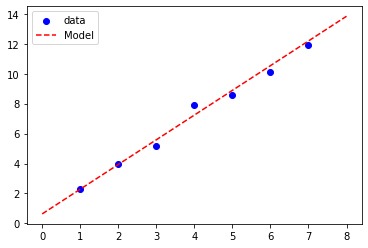

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

graph1= plt.scatter(X_train+X_test, y_train+y_test, color="blue")

import numpy as np

tmp_x = np.linspace(0,8)[:,np.newaxis]
tmp_y = reg.predict(tmp_x)
graph2,= plt.plot(tmp_x, tmp_y, color="red", linestyle="--")

# 범례
plt.legend(handles = [graph1, graph2], labels=["data", "Model"])

### 예제2

- 스탯츠모델에서 최소제곱법으로 단순 선형 회귀 수행

**1. api 모듈에 있는 add_constant 함수를 이용하여 상수항을 추가하도록 지정한다.** 
- 매개변수는 학습용 데이터의 독립변수 집합이다.
- 반환 결과는 회귀 모형에 상수항이 추가되도록 변형된 독립변수 집합이다

In [54]:
import statsmodels.api as sm

X_train = [[1],[2],[3],[4],[5]]
y_train = [2.3, 3.99, 5.15, 7.89, 8.6]

X_train = sm.add_constant(X_train)
print(X_train)

# 왼쪽 1들 -> 절편을 계산하기 위한 가짜
# 원본 훈련 데이터를 인자로 넣어서 절편부분이 생기도록 상수처리 해야됨

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


**2. api 모듈에 있는 OLS를 이용하여, 선형 회귀를 수행할 수 있는 객체를 생성한다.**
- 첫 번째 매개변수는 학습용 데이터의 **종속변수** 집합이다.
- 두 번째 매개변수는 학습용 데이터의 **독립변수** 집합이다.

**3. 선형 회귀를 수행할 객체에 대하여 fit 메소드를 이용하여 학습을 수행하여 회귀 모형을 추정한다.**
- 학습용 데이터들을 이미 객체에 넣어 주었기 때문에, 매개변수로 데이터를 전달하지 않는다.

In [55]:
lr = sm.OLS(y_train, X_train)
reg = lr.fit()

**4. 추정된 회귀 모형에 대하여 predict 메소드를 이용하여 예측을 수행한다.**
- 매개변수는 검증용 데이터의 독립변수 집합으로서, 학습 때와 마찬가지로 미리 상수항을 추가시켜야 한다.
- 반환 결과는 검증용 데이터에 대한 종속변수 예측값이다.

In [57]:
X_test = [[6], [7]]
y_test = [10.1, 11.9]

X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

print(y_pred)

[10.536 12.186]


**5. 추정된 회귀 모형에 대하여 summary 메소드를 이용하여 분석 결과를 평가한다.**  
       (R2, 회귀 계수, 기타 검정 통계량 등)

In [58]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     116.2
Date:                Tue, 14 Jul 2020   Prob (F-statistic):            0.00171
Time:                        17:00:13   Log-Likelihood:                -2.1891
No. Observations:                   5   AIC:                             8.378
Df Residuals:                       3   BIC:                             7.597
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6360      0.508      1.253      0.2

C:\Users\ryzen\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


P > |t| (유의확률 p-value)
- 원래의 상태와 모델의 상태를 비교했을 때 얼마나 의미가 있는지 확인하는 지표
- 값이 낮을 수록 유의미

# 3.실습

In [62]:
import sklearn.datasets as d
# dir(d)
# load_boston  # 회귀분석용 데이터

boston = d.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [74]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [77]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [152]:
# 독립변수, 종속변수 확인하기

# 방의 갯수를 독립변수(X)로 정하자
import pandas as pd

data = pd.DataFrame(boston.data, columns = boston.feature_names)
data.head()

X = pd.DataFrame(data["RM"])  # Series이기 때문에 DataFrame으로 만든다. // 같은 모양이 되도록
y = pd.DataFrame(data["LSTAT"])

In [153]:
X_train = X[:380]
X_test = X[380:]
y_train = y[:380]
y_test = y[380:]

lr = lm.LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [154]:
mse = mt.mean_squared_error(y_test, y_pred)   # function(정답, 예측값)
print("MSE: {:.3f}".format(mse))
rmse = np.sqrt(mse)
print("RMSE: {:.3f}".format(rmse))

r2 = mt.r2_score(y_test, y_pred)
print("R2: {:.3f}".format(r2))
r2 = reg.score(X_test, y_test)
print("R2: {:.3f}".format(r2))

print("회귀 계수:", reg.coef_)
print("절편:", reg.intercept_)

MSE: 68.563
RMSE: 8.280
R2: -0.771
R2: -0.771
회귀 계수: [[-5.35368067]]
절편: [44.72305285]


In [155]:
print("회귀식: y = {:.2f} X + {:.3f}".format(reg.coef_[0][0], reg.intercept_[0]))

회귀식: y = -5.35 X + 44.723


Text(0, 0.5, 'LSTAT')

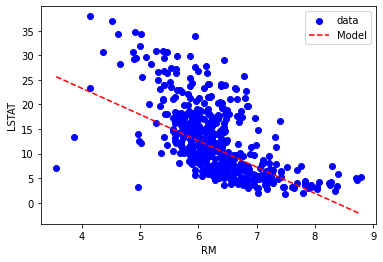

In [156]:
%matplotlib inline

graph1= plt.scatter(X_train.append(X_test), y_train.append(y_test), color="blue")

tmp_x = np.linspace(X.min()[0],X.max()[0])[:,np.newaxis]
tmp_y = reg.predict(tmp_x)
graph2,= plt.plot(tmp_x, tmp_y, color="red", linestyle="--")

# 범례
plt.legend(handles = [graph1, graph2], labels=["data", "Model"])

# 축 이름
plt.xlabel(X.columns[0])
plt.ylabel(y.columns[0])

In [150]:
X.min()[0]

3.561

In [2]:
import sklearn.datasets as d

boston = d.load_boston()

In [3]:
import pandas as pd

df = pd.DataFrame(boston.data, columns = boston.feature_names)

X = pd.DataFrame(df["RM"])
y = boston.target

In [5]:
import sklearn.model_selection as ms

X_train, X_test, y_train, y_test = \
ms.train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
import sklearn.linear_model as lm

reg = lm.LinearRegression().fit(X_train, y_train)

In [11]:
y_pred = reg.predict(X_test)

In [16]:
import sklearn.metrics as mt

mse = mt.mean_squared_error(y_test, y_pred)
print("MSE :",mse)

# reg.score(X_test, y_test)
r2 = mt.r2_score(y_test, y_pred)
print("R2 :",r2)

MSE : 36.51721473083863
R2 : 0.6015774471545621


In [17]:
print("coef :", reg.coef_)
print("intercept :", reg.intercept_)

coef : [8.46109164]
intercept : -30.5710324108983


In [19]:
X.describe()  # 통계가 가능한 column의 통계치를 보여줌

,RM
count,506.000000
mean,6.284634
std,0.702617
min,3.561000
25%,5.885500
50%,6.208500
75%,6.623500
max,8.780000


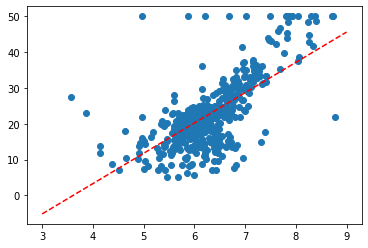

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
xx = np.linspace(3, 9)[:, np.newaxis]
yy = reg.predict(xx)

plt.scatter(X,y)
plt.plot(xx, yy, color = "red", linestyle="--")

In [25]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>